In [1]:
import matplotlib.pyplot as plt
import torch

from render import initialize_scene

In [ ]:
colmap_path = "../data/360-extra/treehill/sparse/0"
image_num = 100  # Index of the image to render

# Initialize scene
scene = initialize_scene(colmap_path)

/home/gpuserver/sajon-blob/GaussianSceneRender-Python/test/GaussianSceneRender-Python/render.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.Tensor(all_points3d), torch.Tensor(all_point_colors)


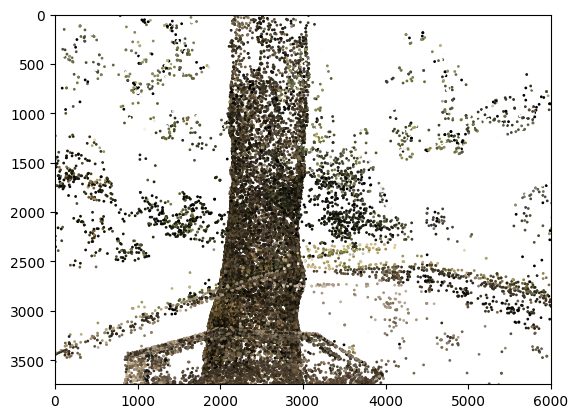

In [3]:
# show all points in the scene
processed_scene = scene.preprocess(image_num)
plt.scatter(
    processed_scene.points_xy[:, 0].detach().cpu(),
    processed_scene.points_xy[:, 1].detach().cpu(),
    c=processed_scene.colors.detach().cpu(),
    s=1,
)
plt.xlim(0, 6000)
plt.ylim(0, 3744)
plt.gca().invert_yaxis()

  0%|          | 0/316 [00:00<?, ?it/s]

100%|██████████| 316/316 [18:36<00:00,  3.53s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..234.25061].


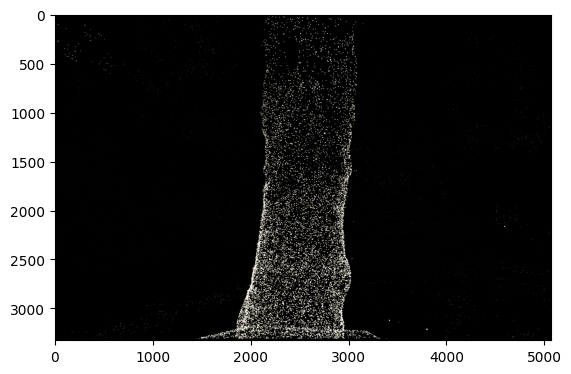

In [ ]:
# render scene 
with torch.no_grad():
    rendered_image = scene.render_image(image_idx=image_num)

plt.imshow(rendered_image.cpu().detach().transpose(0, 1) * 255)
plt.show()

In [ ]:
### CUDA render

import os

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

os.environ["MAX_JOBS"] = "10"

module = scene.compile_cuda_ext()

Using /home/gpuserver/.cache/torch_extensions/py39_cu117 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/gpuserver/.cache/torch_extensions/py39_cu117/inline_ext/build.ninja...
Building extension module inline_ext...
Using envvar MAX_JOBS (10) as the number of workers...


[1/3] c++ -MMD -MF main.o.d -DTORCH_EXTENSION_NAME=inline_ext -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1011\" -isystem /home/gpuserver/sajon-blob/GaussianSceneRender-Python/.venv/lib/python3.9/site-packages/torch/include -isystem /home/gpuserver/sajon-blob/GaussianSceneRender-Python/.venv/lib/python3.9/site-packages/torch/include/torch/csrc/api/include -isystem /home/gpuserver/sajon-blob/GaussianSceneRender-Python/.venv/lib/python3.9/site-packages/torch/include/TH -isystem /home/gpuserver/sajon-blob/GaussianSceneRender-Python/.venv/lib/python3.9/site-packages/torch/include/THC -isystem /usr/local/cuda-12.2/include -isystem /home/gpuserver/.pyenv/versions/3.9.18/include/python3.9 -D_GLIBCXX_USE_CXX11_ABI=0 -fPIC -std=c++17 -c /home/gpuserver/.cache/torch_extensions/py39_cu117/inline_ext/main.cpp -o main.o 
[2/3] /usr/local/cuda-12.2/bin/nvcc  -DTORCH_EXTENSION_NAME=inline_ext -DTORCH_API_INCLUDE_EXTE

Loading extension module inline_ext...


In [5]:
image = scene.render_image_cuda(image_num, tile_size=16)

Using /home/gpuserver/.cache/torch_extensions/py39_cu117 as PyTorch extensions root...
No modifications detected for re-loaded extension module inline_ext, skipping build step...
Loading extension module inline_ext...


CUDA render time (approx.): 0.7707717418670654 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..252.46785].


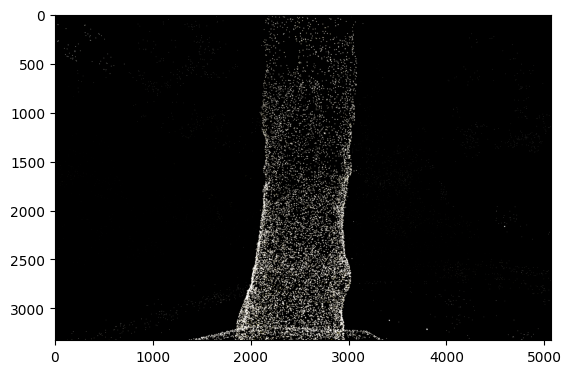

In [6]:
plt.imshow(image.detach().cpu() * 255)